In [1]:
'''Trains a simple convnet on the Zalando MNIST dataset.
Gets to 81.03% test accuracy after 30 epochs
(there is still a lot of margin for parameter tuning).
3 seconds per epoch on a GeForce GTX 980 GPU with CuDNN 5.
'''

from __future__ import print_function
import numpy as np
import mnist_reader as mr
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# import BatchNormalization
from keras.layers.normalization import BatchNormalization
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
x_train, y_train = mr.load_mnist('data/fashion', kind='train')
x_test, y_test = mr.load_mnist('data/fashion', kind='t10k')

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

nadam = keras.optimizers.Nadam(lr=0.002)
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=nadam,
              metrics=['accuracy'])
final_record = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.2)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 48000 samples, validate on 12000 samples
Epoch 1/12
48000/48000 [==============================] - 374s 8ms/step - loss: 0.6290 - acc: 0.8110 - val_loss: 3.7780 - val_acc: 0.1863
Epoch 2/12
48000/48000 [==============================] - 390s 8ms/step - loss: 0.3721 - acc: 0.8663 - val_loss: 0.2865 - val_acc: 0.8927
Epoch 3/12
48000/48000 [==============================] - 388s 8ms/step - loss: 0.3351 - acc: 0.8769 - val_loss: 0.2773 - val_acc: 0.9013
Epoch 4/12
48000/48000 [==============================] - 374s 8ms/step - loss: 0.3114 - acc: 0.8859 - val_loss: 0.2535 - val_acc: 0.9053
Epoch 5/12
48000/48000 [==============================] - 381s 8ms/step - loss: 0.2918 - acc: 0.8939 - val_loss: 0.2447 - val_acc: 0.9126
Epoch 6/12
48000/48000 [==============================] - 411s 9ms/step - loss: 0.2842 - acc: 0.8975 - val_loss: 0.2583 - val_acc: 0.9089
Epoch 7/12
48000/48000 [=========================

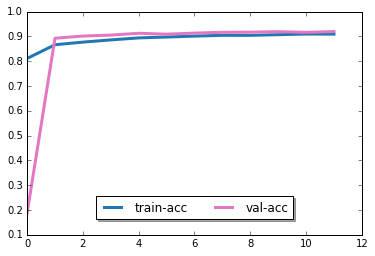

In [2]:
#Plot iter accuracy curve
#Store your every iter number and accuracy in tow numpy array "iter_log" and "accuracy_log"
import matplotlib.pyplot as plt
%matplotlib inline
iter_log = np.empty((0,12),int)
train_loss = np.empty((0,12),int)
val_loss = np.empty((0,12),int)
for i in range(0,12):
    iter_log = np.append(iter_log,i)
    
train_acc = final_record.history['acc']
val_acc = final_record.history['val_acc']

ax = plt.subplot(111)
plt.plot(iter_log, train_acc, label='train-acc', color="#1f77b4", linewidth=3)
plt.plot(iter_log, val_acc, label='val-acc', color="#e377c2", linewidth=3)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 0.2),  shadow=True, ncol=2)
plt.show()

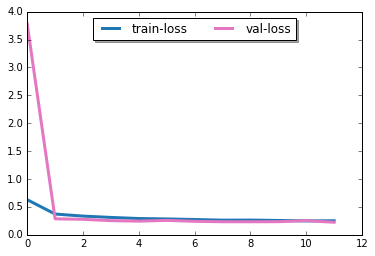

In [3]:
#Plot iter accuracy curve
#Store your every iter number and accuracy in tow numpy array "iter_log" and "accuracy_log"
import matplotlib.pyplot as plt
%matplotlib inline
iter_log = np.empty((0,12),int)
train_loss = np.empty((0,12),int)
val_loss = np.empty((0,12),int)
for i in range(0,12):
    iter_log = np.append(iter_log,i)
    
train_loss = final_record.history['loss']
val_loss = final_record.history['val_loss']

ax = plt.subplot(111)
plt.plot(iter_log, train_loss, label='train-loss', color="#1f77b4", linewidth=3)
plt.plot(iter_log, val_loss, label='val-loss', color="#e377c2", linewidth=3)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),  shadow=True, ncol=2)
plt.show()

**Final nn :** <br\>
> 1. **Model layer :** <br\>
> Conv2D => BatchNormalization => Conv2D => BatchNormalization => MaxPooling2D
>    => Dropout => Flatten => BatchNormalization => activate by relu => Dropout => softmax
> 2. **Optimizer :** Nadam , lr = 0.002 
>> ＊ keras.optimizers.Nadam( lr = 0.002 )
> 3. Test loss: 0.245943645543
> 4. Test accuracy: 0.9141
> 5. 第二個epoch就已經收斂到89%